In [1]:
import sklearn.datasets
import numpy as np
import matplotlib.pyplot as plt
import random

In [2]:
iris = sklearn.datasets.load_iris()

X = np.array(iris.data)[:100, :2]
y = np.array(iris.target)[:100]
y[y == 0] = -1

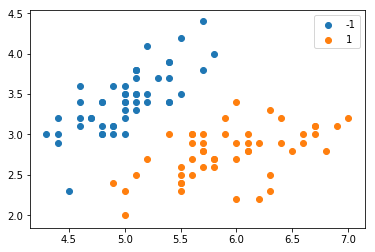

In [3]:
plt.scatter(X[:50,0],X[:50,1], label='-1')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()

In [4]:
class Perceptron:
    def __init__(self, lr, num_iter):
        self.lr = lr
        self.num_iter = num_iter
        self.W = None
        self.b = None
    
    def fit(self, X, y):
        self.num_sample, self.num_feature = X.shape
        self.W = np.zeros(self.num_feature)
        self.b = np.zeros(1)
        
        iter = 0
        while iter < self.num_iter:
            num_wrong = 0
            for j in range(self.num_sample):
                feature = X[j]
                label = y[j]
                if label * (np.dot(self.W, feature) + self.b) <= 0:
                    iter += 1
                    num_wrong += 1
                    self.W += self.lr * label * feature
                    self.b += self.lr * label
            if num_wrong == 0:
                print("Perceptron OK after %d iter" % iter)
                return

        print("Perceptron fail after %d iter" % self.num_iter)
    
    def predict(self, X):
        return 1 if np.dot(self.W, X) + self.b > 0 else -1

In [5]:
perceptron = Perceptron(0.1, 2000)

In [6]:
perceptron.fit(X, y)

Perceptron OK after 1518 iter


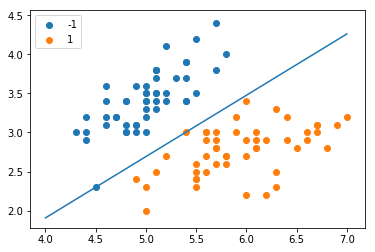

In [7]:
x_ = np.linspace(4, 7, 10)
y_ = -(perceptron.W[0] * x_ + perceptron.b) / perceptron.W[1]
plt.plot(x_, y_)

plt.scatter(X[:50,0],X[:50,1], label='-1')
plt.scatter(X[50:,0],X[50:,1], label='1')
plt.legend()